# [Time to cut your n-dimensional cake](https://xpuzzlecorner.substack.com/p/time-to-cut-your-n-dimensional-cake)
September 22, 2024

## Problem

_For this weeks puzzle, it’s your birthday! Being such, your 59,049 closest family and friends ones have come together to get you a rather remarkable gift—a 10-dimensional cake. Think of all the frosting! You’ve made your wish and blown out your candles and, of course, you wished for a good puzzle because you’re a dork. All that’s left is to cut the cake with your handy dandy n-dimensional knife. In an act of providence, your friend asks “What’s the quickest way to cut this?” and you realize, you have your puzzle you wished for!_

_More specifically, 59,049 happens to be 310 so to keep things simply you decide to cut the cake twice in each dimension (i.e. your cut is a hyperplane orthogonal to a particular dimension). If you allow yourself to reassemble the pieces after each cut, what are the fewest number of cuts needed?_

_At this point, if you’re a little confused by this problem, don’t worry. Keep reading and it should get clearer._

_This puzzle was inspired by Martin Gardner’s Cutting the Cube puzzle which goes as follows._

_A carpenter, working with a buzz saw, wishes to cut a wooden cube, three inches on a side, into 27 one-inch cubes.  He can do this job easily by making six cuts through the cube, keeping the pieces together in the cube shape.  Can he reduce the number of necessary cuts by rearranging the pieces after each cut?  Either show how or prove that it’s impossible._


_I won’t spoil the answer to this because its a fun puzzle and it can be used to help with the solution of our hyperdimensional version of the problem. As an additional intermediate problem, I suggest extending the problem to consider a cube with 4 inch sides and 9 cuts._

_To summarize, the questions this week in order are:_

- _What is the fewest number of cuts needed to divide a cube of side length three into 27 cubes of side length 1, assuming you can rearrange the pieces of the cube as you make cuts?_

- _What is the fewest number of cuts needed to divide a cube of side length four into 64 cubes of side length 1, assuming you can rearrange the pieces of the cube as you make cuts?_

- _What is the fewest number of cuts needed to divide an 10-dimensional hypercube of side length 3 into 59,049 hypercubes of side length 1, assuming you can rearrange the pieces of the cube as you make cuts?_

## Solution

What we really need for this problem is a systematic way for finding the most efficient cuts. The abstraction I used for this problem was to consider each cut as exposing certain surfaces of 1x1x1 cubes we ultimately want. For example, the whole 3x3x3 cube has 54 of the 1x1 faces exposed. We ultimately need all 27 1x1x1 cubes to have all 6 faces exposed. This is the same as saying we need to expose 162 faces. The most efficient cuts the pieces are to find the dimension which results in the most faces being explosed. If we represent each piece as a tuple of length n dimension where each entry is the length of the piece along that dimension, then we can do this by looping over each dimension and find the dimension which has the largest product of the other dimensions. This is the dimension which will expose the most faces. We can then cut along this dimension and repeat the process recursively on each piece until we have all the faces exposed. 

In [32]:
def find_minium_rounds(n, l):
    starting_tuple = tuple([l] * n)
    memo = {tuple([1]*n): 0}

    def perform_cut(piece):
        if piece in memo:
            return memo[piece]
        
        total_product = 1
        for num in piece:
            total_product *= num

        max_split = -1
        idx = None
        for i in range(len(piece)):
            if piece[i] == 1:
                continue
            product = total_product // piece[i]
            if product > max_split:
                max_split = product
                idx = i
        
        split_size = piece[idx] // 2
        new_piece_1 = list(piece)
        new_piece_1[idx] = split_size
        new_piece_2 = list(piece)
        new_piece_2[idx] -= split_size

        new_piece_1 = tuple(sorted(new_piece_1))
        new_piece_2 = tuple(sorted(new_piece_2))

        memo[piece] = 1 + max(perform_cut(new_piece_1), perform_cut(new_piece_2))
        return memo[piece]
    
    return perform_cut(starting_tuple)

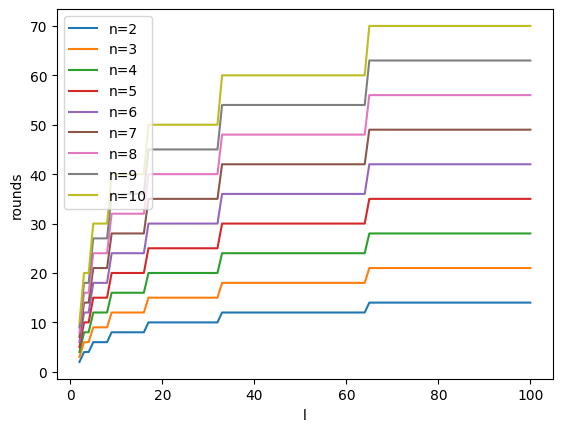

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Parameter sweeping
ns = [n for n in range(2, 11)]
ls = [l for l in range(2, 101)]
results = []
for n in ns:
    for l in ls:
        results.append((n, l, find_minium_rounds(n, l)))
        # print(f"n: {n}, l: {l}, rounds: {results[-1][2]}")

# plot results - show lines plots for each n
for n in ns:
    x = [result[1] for result in results if result[0] == n]
    y = [result[2] for result in results if result[0] == n]
    plt.plot(x, y, label=f"n={n}")
plt.xlabel("l")
plt.ylabel("rounds")
plt.legend()
plt.show()


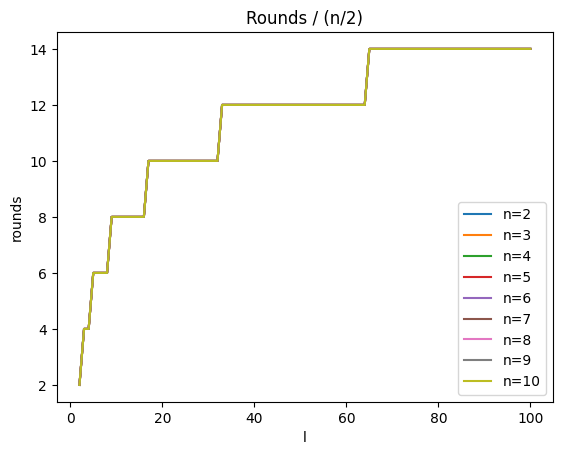

In [47]:
# Show plot that illustrates that each line is just a factor difference from each other
for n in ns:
    x = [result[1] for result in results if result[0] == n]
    y = [result[2] / (n/2) for result in results if result[0] == n]
    plt.plot(x, y, label=f"n={n}")
plt.xlabel("l")
plt.ylabel("rounds")
plt.title("Rounds / (n/2)")
plt.legend()
plt.show()

In [58]:
from functools import lru_cache

def find_minimum_rounds_exhaustive(n, l):
    starting_tuple = tuple([l] * n)
    target_tuple = tuple([1] * n)
    memo = {}

    def perform_cut(piece):
        # Check memoization dictionary
        if piece in memo:
            return memo[piece]

        # Base case: if the piece is already fully divided into 1s
        if piece == target_tuple:
            return 0

        min_cuts = float('inf')

        # Try all possible cuts in each dimension
        for i in range(len(piece)):
            if piece[i] > 1:
                # Try all possible split points for the current dimension
                for split_size in range(1, piece[i]):
                    remainder_size = piece[i] - split_size

                    # Create new pieces after the cut
                    new_piece_1 = list(piece)
                    new_piece_2 = list(piece)
                    new_piece_1[i] = split_size
                    new_piece_2[i] = remainder_size

                    # Convert to tuples for recursive calls
                    new_piece_1 = tuple(sorted(new_piece_1))
                    new_piece_2 = tuple(sorted(new_piece_2))

                    # Recursively determine the number of cuts for both new pieces
                    cuts = 1 + max(perform_cut(new_piece_1), perform_cut(new_piece_2))
                    min_cuts = min(min_cuts, cuts)

        # Store result in memoization dictionary
        memo[piece] = min_cuts
        return min_cuts
    
    return perform_cut(starting_tuple)

6


In [60]:
# Compare a few small values from each implementation to verify correctness
for n in range(2, 11):
    for l in range(2, 11):
        print(f"n: {n}, l: {l}")
        s1 = find_minium_rounds(n, l)
        s2 = find_minimum_rounds_exhaustive(n, l)
        print(f"Heuristic Solution: {s1}, Exaustive Solution: {s2}")
        assert find_minium_rounds(n, l) == find_minimum_rounds_exhaustive(n, l)

n: 2, l: 2
Heuristic Solution: 2, Exaustive Solution: 2
n: 2, l: 3
Heuristic Solution: 4, Exaustive Solution: 4
n: 2, l: 4
Heuristic Solution: 4, Exaustive Solution: 4
n: 2, l: 5
Heuristic Solution: 6, Exaustive Solution: 6
n: 2, l: 6
Heuristic Solution: 6, Exaustive Solution: 6
n: 2, l: 7
Heuristic Solution: 6, Exaustive Solution: 6
n: 2, l: 8
Heuristic Solution: 6, Exaustive Solution: 6
n: 2, l: 9
Heuristic Solution: 8, Exaustive Solution: 8
n: 2, l: 10
Heuristic Solution: 8, Exaustive Solution: 8
n: 3, l: 2
Heuristic Solution: 3, Exaustive Solution: 3
n: 3, l: 3
Heuristic Solution: 6, Exaustive Solution: 6
n: 3, l: 4
Heuristic Solution: 6, Exaustive Solution: 6
n: 3, l: 5
Heuristic Solution: 9, Exaustive Solution: 9
n: 3, l: 6
Heuristic Solution: 9, Exaustive Solution: 9
n: 3, l: 7
Heuristic Solution: 9, Exaustive Solution: 9
n: 3, l: 8
Heuristic Solution: 9, Exaustive Solution: 9
n: 3, l: 9
Heuristic Solution: 12, Exaustive Solution: 12
n: 3, l: 10
Heuristic Solution: 12, Exaustive